In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [ ]:
data = np.genfromtxt("/home/kahurd/astr-19/group-project/data.txt",
                     dtype=[('day', 'i8'),('time','U6'),('height','f8')])

day = []
time = []
height = []

for i in range(82):
    day.append(data[i][0])
    time.append(data[i][1])
    height.append(data[i][2])
    
timeint = []
hour = []
minute = []

for i in range(82):
    timeint.append(time[i].split(":"))
    hour.append(int(timeint[i][0]))
    minute.append(int(timeint[i][1]))
    
for i in range (82):
    day[i] = day[i] + (hour[i] + (minute[i]/60))/24

plt.plot(day,height, '-o')
plt.xlabel("day")
plt.ylabel("height")
print(day)

In [ ]:
def f_line(x, a, b, c, d):
    return a * np.sin(b*x + c) + d

#perform the fit
params, params_cov = optimize.curve_fit(f_line, day, height, sigma = [0.25] * len(data), p0 = [4.2, 0.3, -2, 2.3])

a_fit = params[0]
b_fit = params[1]
c_fit = params[2]
d_fit = params[3]

print(a_fit,b_fit,c_fit,d_fit)

y_fit = f_line(np.array(day), a_fit, b_fit, c_fit, d_fit)

plt.plot(day, y_fit, label='Fitted Curve', color='red')
plt.plot(day, height, '-o', label='Data Collected')
plt.xlabel("Day of the Year")
plt.ylabel("Tide Height in Feet")
plt.legend()
plt.show()
plt.savefig("data-and-curve.pdf",bbox_inches="tight",facecolor="white")

In [ ]:
'''

#all the days with the lowest tides
daylows =[]
for i in range(82):
    if i % 2 == 1:
        daylows.append(day[i])

#all the lowest tide data
datalows=[]
for i in range(82):
    if i % 2 == 1:
        datalows.append(height[i])


print(daylows)
print(datalows)
    
params, params_cov = optimize.curve_fit(f_line, daylows, datalows, sigma = [0.25] * len(datalows), p0 = [2.0, 0.3, -10, .5])

a_fitlow = params[0]
b_fitlow = params[1]
c_fitlow = params[2]
d_fitlow = params[3]

print(a_fitlow,b_fitlow,c_fitlow,d_fitlow)

y_fitlow = f_line(np.array(datalows), a_fitlow, b_fitlow, c_fitlow, d_fitlow)

plt.plot(daylows, y_fitlow, label='Fitted Curve (lows)', color='orange')
plt.plot(day, height, '-o', label='Data Collected')
plt.xlabel("Day of the Year")
plt.ylabel("Tide Height in Feet")
plt.legend()
plt.show()
#plt.savefig("data-and-curve.pdf",bbox_inches="tight",facecolor="white")
'''

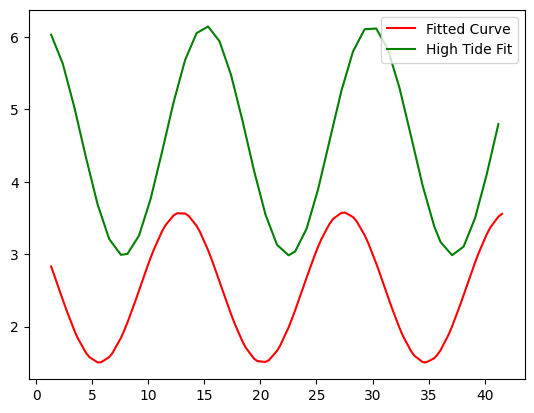

In [54]:
highs = []
highdays = []
for i in range(82):
    if i % 2 ==0:
        highdays.append(day[i])

for i in range(82):
    if i % 2 == 0:
        highs.append(height[i])

params, params_cov = optimize.curve_fit(f_line, highdays, highs, sigma = [0.25] * len(highs), p0 = [2, 0.5, -3, 4])

u_fit = params[0]
v_fit = params[1]
w_fit = params[2]
z_fit = params[3]

high_fit = f_line(np.array(highdays), u_fit, v_fit, w_fit, z_fit)

plt.plot(day, y_fit, label = 'Fitted Curve', color = 'red')
plt.plot(highdays, high_fit, label = 'High Tide Fit', color = 'green')
plt.legend()
plt.show()